In [1]:
# Magic + imports
%load_ext autoreload
%autoreload 2
%matplotlib inline

CMAP = "Blues"

In [2]:
# set path
import sys
sys.path.append('/home/jovyan/odc-hub/')
# import required modules
import warnings
warnings.filterwarnings('ignore')
import xarray as xr 
import functools as fct
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce 

# import required datacube modules
from utils_sac.interactive_maps import display_map
from utils_sac.notebook_animation_widgets import create_movie_on_np_array
from utils_sac.plotting import plot_availability

# Water Monitoring

Exploiting multi-modal approaches for generating satellite-derived products can offer spatial-temporal advantages of improved completeness of data completedness and accuracy.

### Water products  

Interoperability is explored across three derived water products from `Sentinel 1`, `Sentinel 2` and `Landsat 8`. The classification and initial data-exploration is conducted in separate notebooks listed below: 

   - `Sentinel 1`   
   A thresholding algorthim takes advantage of linear class separability on vv and vh bands to classify water.  
     
     
   - `Landsat 8`
   The Water Observations From Space(WOFS) algorithm is applied to Landsat8 imagery. WOFS uses a decision tree on surface reflectance features.    
   
   
   - `Sentinel 2`
   The Water Observations From Space(WOFS) algorithm is applied to Sentinel 2 imagery. While the original WOFS algorithm was trained and calibrated on Landsat 7 imagery, relatively consistent results are expected from a re-application on Sentinel 2 imagery and are tolerated for the purpose of exploring interoperability.     
   


### Loading Water Products  

Created using the linked scripts above and saved as NetCDF's. 

In [3]:
# Define dataset file paths
DATA_DIR = Path('/home/shared/geo_demos/wofs_testers')

DATASETS = {
    'l8': DATA_DIR / 'l8_wofs_product_VL.nc',
    's1': DATA_DIR / 's1_wofs_product_VL.nc',
    's2': DATA_DIR / 's2_wofs_product_VL.nc'
}

In [4]:
# Load datasets
datasets = {name: xr.open_dataset(path) for name, path in DATASETS.items()}
print('Loaded datasets: {}'.format(', '.join(datasets.keys())))


Loaded datasets: l8, s1, s2


## Fiji - Viti Levu


In [5]:
latitudes = (-17.841796875, -18.297729492187)
longitudes = (178.11035156251, 178.83544921876)

display_map(latitude = latitudes, longitude = longitudes)

# Annual Summary Products  

Annual products for each of the three sensors L8, S1 and S2. Dispalying the number of observation which are recorded as water on a scale of 0 to 1. 

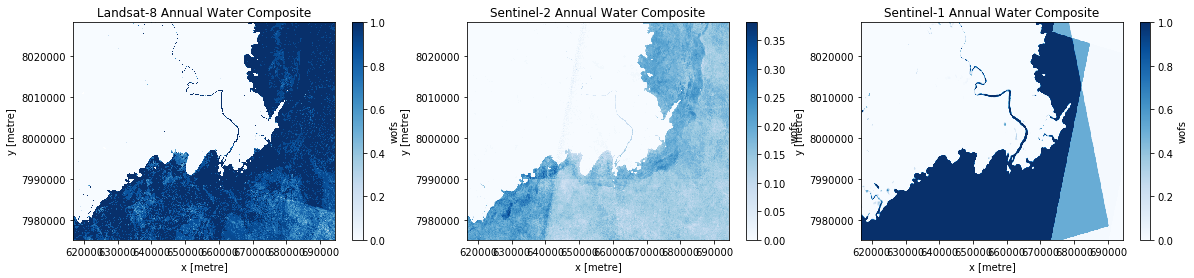

In [6]:
fig, axes = plt.subplots(1,3, figsize = (20,4))

a = datasets["l8"].mean(dim = "time", skipna = True).wofs
b = datasets["s2"].mean(dim = "time", skipna = True).wofs
c = datasets["s1"].mean(dim = "time", skipna = True).wofs

a.plot(ax=axes[0], cmap = CMAP)
axes[0].set_title("Landsat-8 Annual Water Composite")

b.plot(ax=axes[1], cmap = CMAP)
axes[1].set_title("Sentinel-2 Annual Water Composite")

c.plot(ax=axes[2], cmap = CMAP)
axes[2].set_title("Sentinel-1 Annual Water Composite")

plt.show()
del a
del b
del c

# The Individual Sensors

# Landsat 8

In [7]:
print("Total number of L8 images used for the annual product = ", len(datasets["l8"].wofs.values))

Total number of L8 images used for the annual product =  36


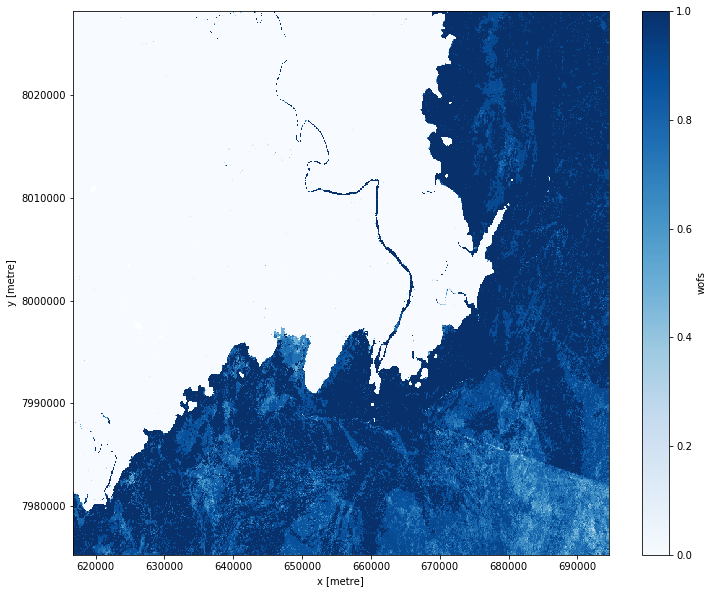

In [8]:
plt.figure(figsize = (12,10))
datasets["l8"].mean(dim = "time", skipna = True).wofs.plot(cmap = CMAP)

In [9]:
monthly_l8 = datasets["l8"].resample(time = "M").mean(skipna = True)

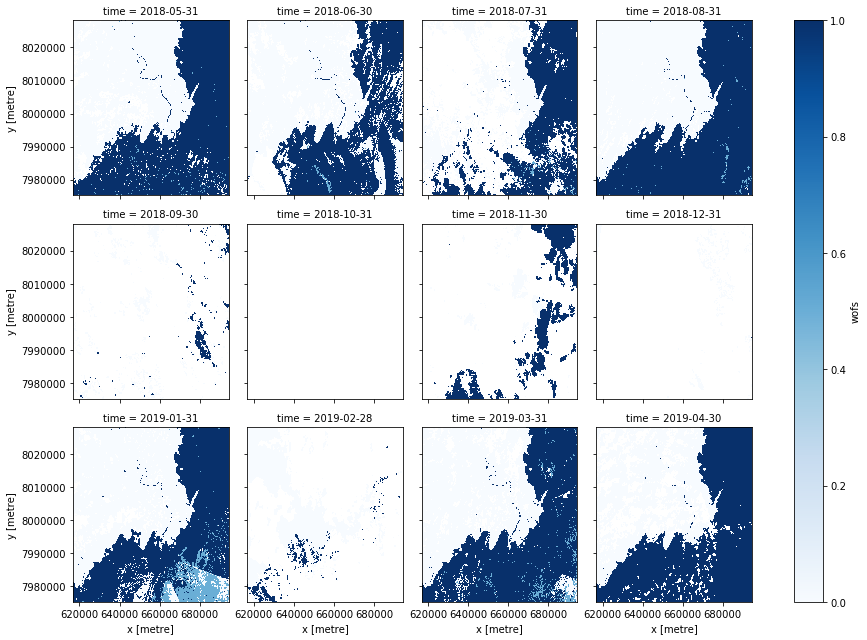

In [10]:
monthly_l8.wofs.plot(col='time',col_wrap=4, cmap = CMAP)

In [11]:
del monthly_l8

## Sentinel 2   

Individual images for the annual product played as a giff. 


In [12]:
print("Total number of S2 images used for the annual product = ", len(datasets["s2"].wofs.values))


Total number of S2 images used for the annual product =  97


Text(0.5, 1.0, 'Sentinel-2 Annual Water Composite')

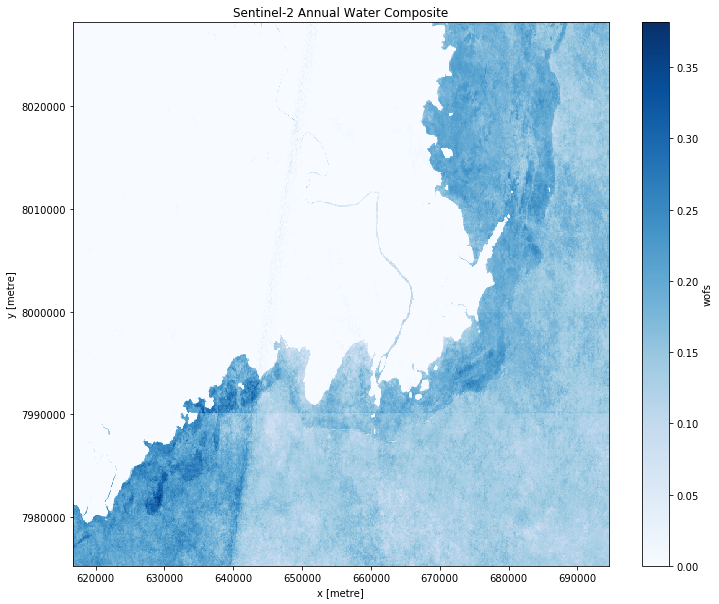

In [13]:
plt.figure(figsize = (12,10))
datasets["s2"].mean(dim = "time", skipna = True).wofs.plot(cmap = CMAP)
plt.title("Sentinel-2 Annual Water Composite")

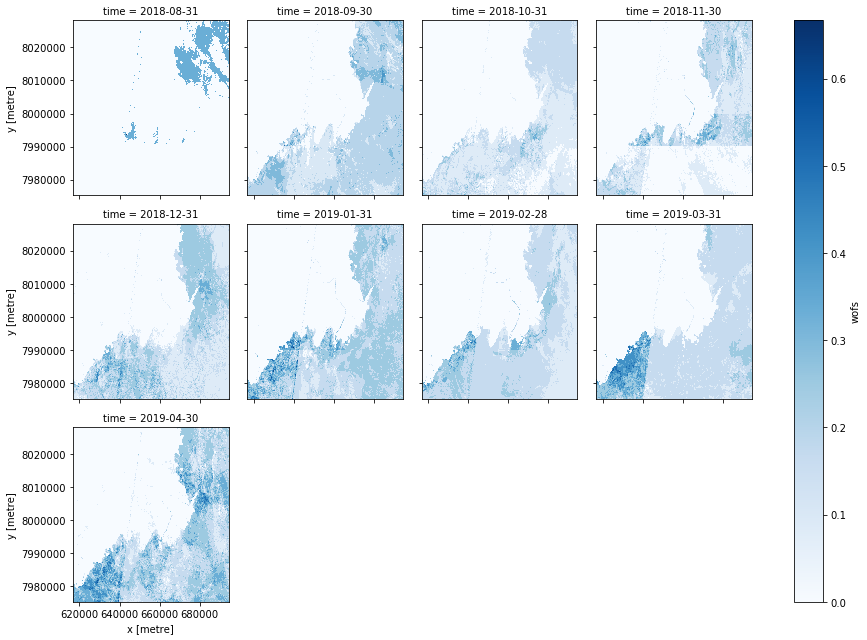

In [14]:
monthly_s2 = datasets["s2"].resample(time = "M").mean(skipna = True)
monthly_s2.wofs.plot(col='time',col_wrap=4, cmap = CMAP)

In [15]:
del monthly_s2

## Sentinel 1 

In [16]:
print("Total number of S1 images used for the annual product = ", len(datasets["s1"].wofs.values))

Total number of S1 images used for the annual product =  53


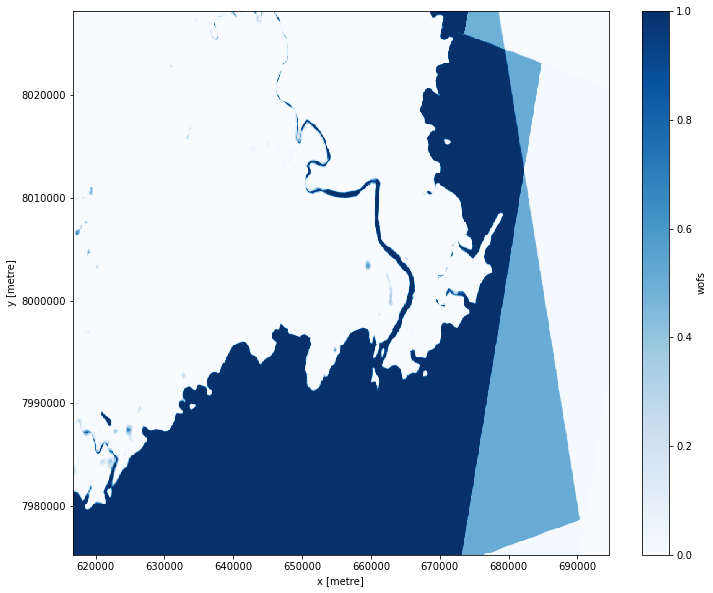

In [17]:
plt.figure(figsize = (12,10))
datasets["s1"].mean(dim = "time", skipna = True).wofs.plot(cmap = CMAP)

In [18]:
monthly_s1 = datasets["s1"].resample(time = "M").mean(skipna = True)

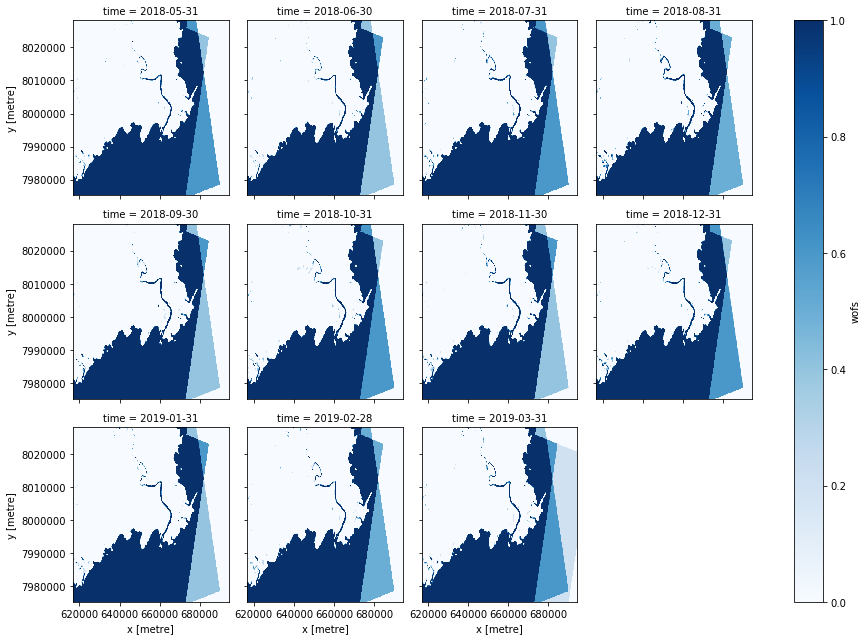

In [19]:
monthly_s1.wofs.plot(col='time',col_wrap=4, cmap = CMAP)

In [20]:
del monthly_s1

# Merged Time Series - Interoperability

In [21]:
#created a merged dataset from the three sensors
merged = fct.reduce(lambda ds_a, ds_b: ds_a.merge(ds_b), datasets.values())

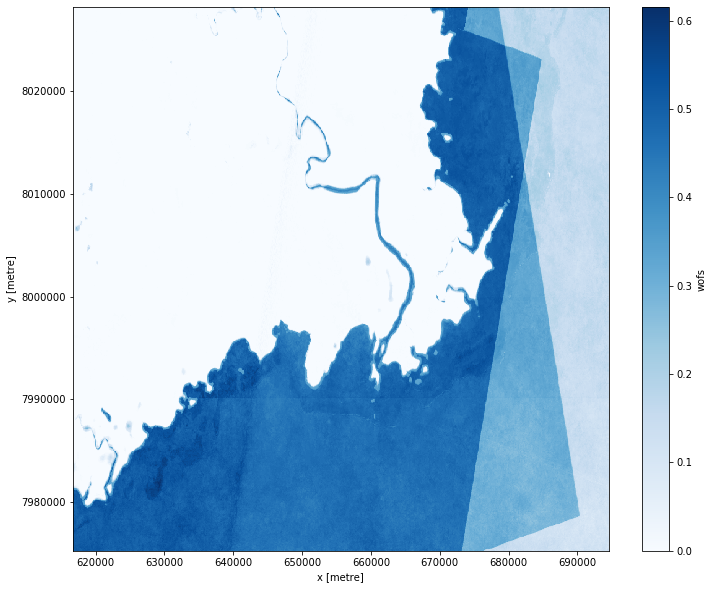

In [22]:
plt.figure(figsize = (12,10))
merged.mean(dim = "time", skipna = True).wofs.plot(cmap = CMAP)

### Monthly Merged Product


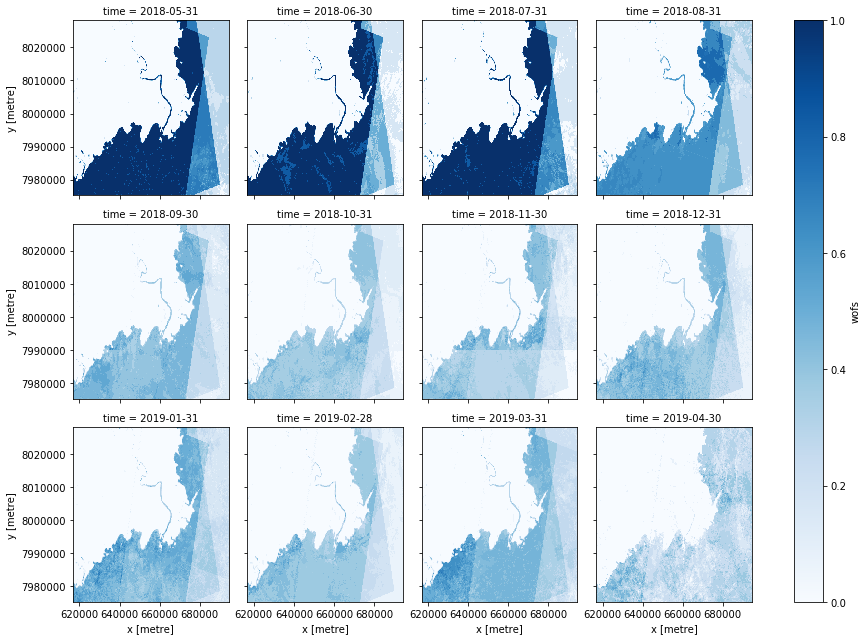

In [23]:
fused_resample = merged.resample(time = "M").mean(skipna = True)
fused_resample.wofs.plot(col='time',col_wrap=4, cmap = CMAP)

In [24]:
del fused_resample